In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import logging

# Set up basic configuration for logging
logging.basicConfig(
    level=logging.DEBUG,  # Set the lowest-severity log message to capture
    format="%(asctime)s - %(levelname)s - %(message)s",  # Define the format of the logs
    handlers=[
        logging.FileHandler("exploration.log"),  # Log messages to a file named "exploration.log"
        logging.StreamHandler()  # Also log to console
    ]
)

# Create a logger instance
logger = logging.getLogger(__name__)


In [5]:
logger.info("Loading dataset.")
try:
    # Load datasets
    train_df = pd.read_csv('../Data/train.csv')
    test_df = pd.read_csv('../Data/test.csv')
    store_df = pd.read_csv('../Data/store.csv')

    logger.info("Datasets loaded successfully.")
except FileNotFoundError as e:
    logger.error(f"Files not found: {e}")
    raise


2024-09-22 21:20:54,339 - INFO - Loading dataset.
C:\Users\Coop\AppData\Local\Temp\ipykernel_1012\3402356908.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../Data/train.csv')
2024-09-22 21:20:54,829 - INFO - Datasets loaded successfully.


In [6]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [9]:
# Merge datasets
df = pd.merge(train_df, store_df, on='Store', how='left')

In [11]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
# Data Cleaning
logger.info("Handling missing values in the dataset.")
df['Date'] = pd.to_datetime(df['Date'])
df['CompetitionOpenSince'] = pd.to_datetime(df['CompetitionOpenSinceMonth'].astype(str) + '-01-' + df['CompetitionOpenSinceYear'].astype(str), errors='coerce')
df['Promo2Since'] = pd.to_datetime(df['Promo2SinceYear'].astype(str) + '-W' + df['Promo2SinceWeek'].astype(str) + '-1', format='%Y-W%W-%w', errors='coerce')
logger.info("Filled missing values in CompetitionDistance column with median.")

2024-09-22 21:29:19,986 - INFO - Handling missing values in the dataset.


C:\Users\Coop\AppData\Local\Temp\ipykernel_1012\4050570814.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CompetitionOpenSince'] = pd.to_datetime(df['CompetitionOpenSinceMonth'].astype(str) + '-01-' + df['CompetitionOpenSinceYear'].astype(str), errors='coerce')
2024-09-22 21:29:22,551 - INFO - Filled missing values in CompetitionDistance column with median.


In [12]:
logger.info("Checking for missing values in df dataset.")
missing_values = train_df.isnull().sum()
logger.info(f"Missing values found:\n{missing_values}")

2024-09-22 21:25:54,997 - INFO - Checking for missing values in df dataset.
2024-09-22 21:25:55,075 - INFO - Missing values found:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [17]:
logger.info("Handling missing values in the dataset.")
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
logger.info("Filled missing values in CompetitionDistance column with median.")


2024-09-22 21:31:08,473 - INFO - Handling missing values in the dataset.
C:\Users\Coop\AppData\Local\Temp\ipykernel_1012\3675718996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
2024-09-22 21:31:08,497 - INFO - Filled missing values in CompetitionDistance column with median.


In [25]:
# Outlier Detection
df = df[(df['Sales'] > 0) & (df['Sales'] < df['Sales'].quantile(0.95))]
df = df[(df['Customers'] > 0) & (df['Customers'] < df['Customers'].quantile(0.95))]

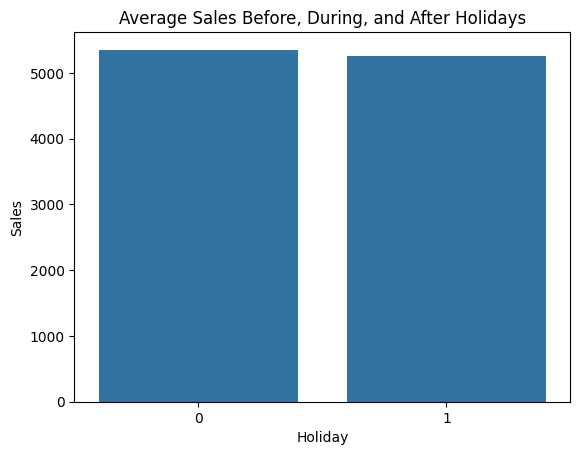

In [26]:
# Sales Behavior Analysis
df['Holiday'] = df['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
sales_holiday = df.groupby(['Holiday'])['Sales'].mean().reset_index()
sns.barplot(data=sales_holiday, x='Holiday', y='Sales')
plt.title('Average Sales Before, During, and After Holidays')
plt.show()

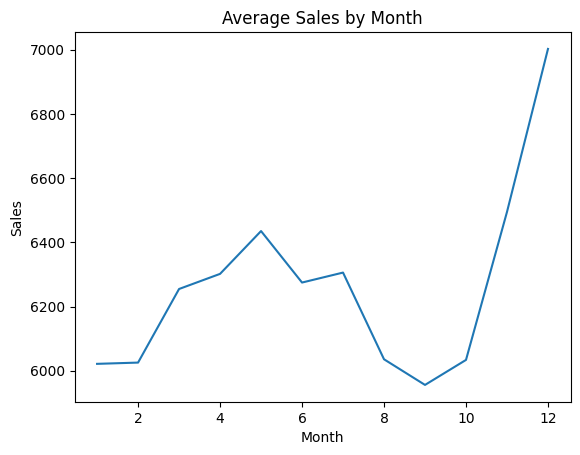

In [16]:
# Seasonal Purchase Behavior
df['Month'] = df['Date'].dt.month
sales_seasonal = df.groupby(['Month'])['Sales'].mean().reset_index()
sns.lineplot(data=sales_seasonal, x='Month', y='Sales')
plt.title('Average Sales by Month')
plt.show()


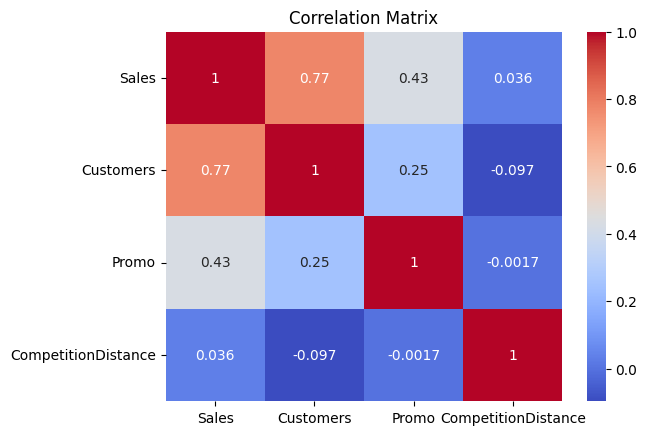

In [26]:
# Correlation Analysis
sns.heatmap(df[['Sales', 'Customers', 'Promo', 'CompetitionDistance']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

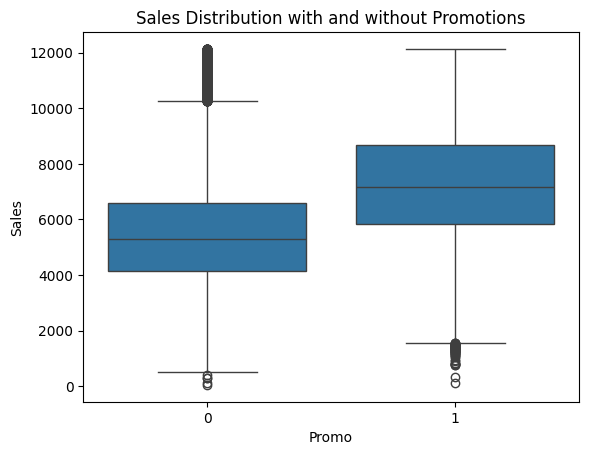

In [18]:
# Impact of Promotions
sns.boxplot(data=df, x='Promo', y='Sales')
plt.title('Sales Distribution with and without Promotions')
plt.show()


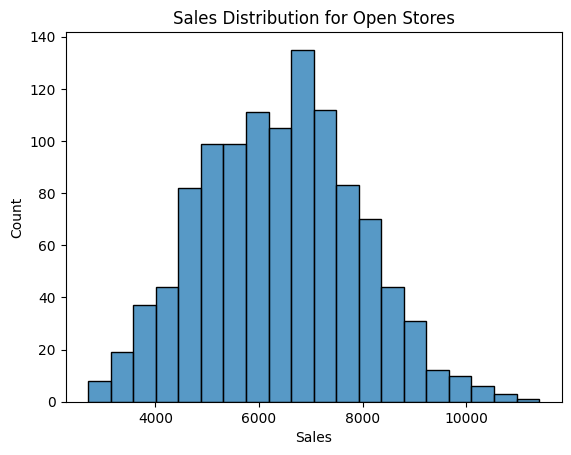

In [19]:
# Store Opening and Closing Trends
store_opening = df[df['Open'] == 1].groupby('Store')['Sales'].mean().reset_index()
sns.histplot(data=store_opening, x='Sales', bins=20)
plt.title('Sales Distribution for Open Stores')
plt.show()

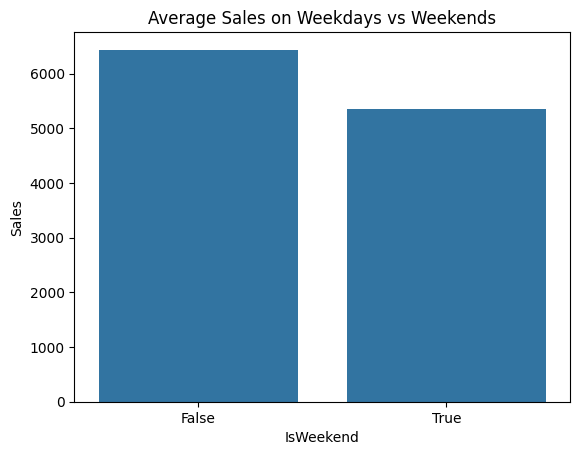

In [20]:
# Weekday vs Weekend Sales
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'] >= 5
sales_weekend = df.groupby(['IsWeekend'])['Sales'].mean().reset_index()
sns.barplot(data=sales_weekend, x='IsWeekend', y='Sales')
plt.title('Average Sales on Weekdays vs Weekends')
plt.show()


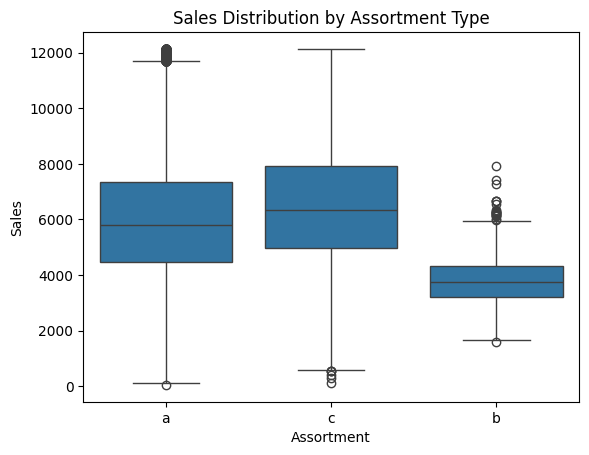

In [21]:
# Assortment Impact
sns.boxplot(data=df, x='Assortment', y='Sales')
plt.title('Sales Distribution by Assortment Type')
plt.show()


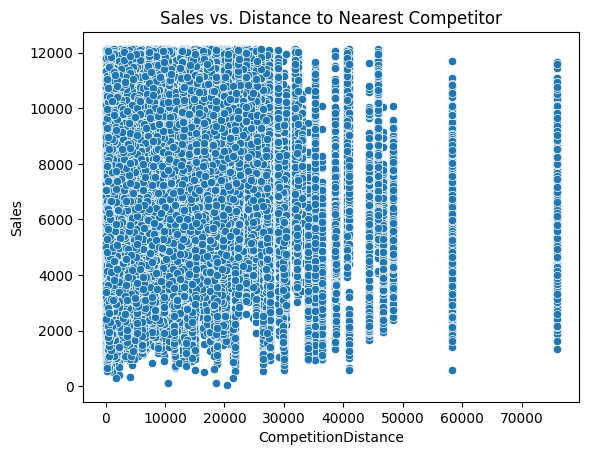

In [23]:
# Competitor Distance
sns.scatterplot(data=df, x='CompetitionDistance', y='Sales')
plt.title('Sales vs. Distance to Nearest Competitor')
plt.show()


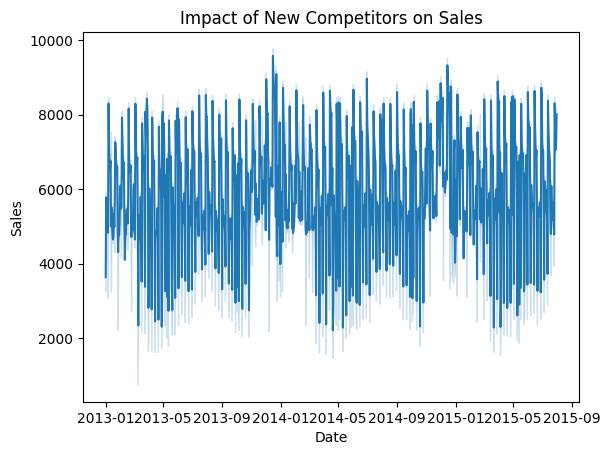

In [25]:
# New Competitors Impact
new_competitors = df[df['CompetitionOpenSinceYear'].notna()]
sns.lineplot(data=new_competitors, x='Date', y='Sales')
plt.title('Impact of New Competitors on Sales')
plt.show()